In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../Data/uspopulation.csv', parse_dates=True, index_col=0)

In [3]:
df.index.freq = 'MS'

In [4]:
df.head(3), df.tail(3)

(            PopEst
 DATE              
 2011-01-01  311037
 2011-02-01  311189
 2011-03-01  311351,
             PopEst
 DATE              
 2018-10-01  328077
 2018-11-01  328241
 2018-12-01  328393)

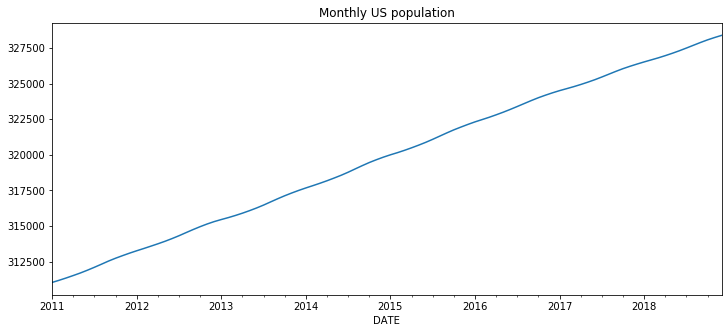

In [5]:
# Plot 

df['PopEst'].plot(title='Monthly US population');

# completely linear data, simple AR model is sufficient to predict the future

# Train test split

In [6]:
train = df.loc[:'2017']
test = df.loc['2018':]

In [7]:
test.shape, train.shape

((12, 1), (84, 1))

# Model / AR(1)

In [8]:
from statsmodels.tsa.ar_model import AR, ARResults

In [9]:
model = AR(train['PopEst'])

In [10]:
AR1fit = model.fit(maxlag=1, method='mle')

In [11]:
print('Max lags: {}'.format(AR1fit.k_ar))
print()
print('Cofficients:\n{}'.format(AR1fit.params))

Max lags: 1

Cofficients:
const        148.163961
L1.PopEst      0.999536
dtype: float64


In [12]:
AR1_pred = AR1fit.predict(len(train), len(df)-1, dynamic=False).rename('AR1 Population Predictions')

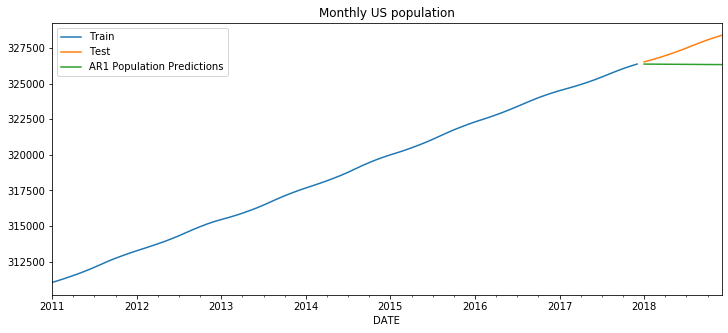

In [13]:
train['PopEst'].plot(title='Monthly US population', label='Train')
test['PopEst'].plot(title='Monthly US population', label='Test')
AR1_pred.plot();
plt.legend()

# Model / AR(2)

In [14]:
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2, method='mle')

In [15]:
print('Max lags: {}'.format(AR2fit.k_ar))
print()
print('Cofficients:\n{}'.format(AR2fit.params))

Max lags: 2

Cofficients:
const        135.427091
L1.PopEst      1.996654
L2.PopEst     -0.997079
dtype: float64


In [16]:
AR2_pred = AR2fit.predict(len(train), len(df)-1, dynamic=False).rename('AR2 Population Predictions')

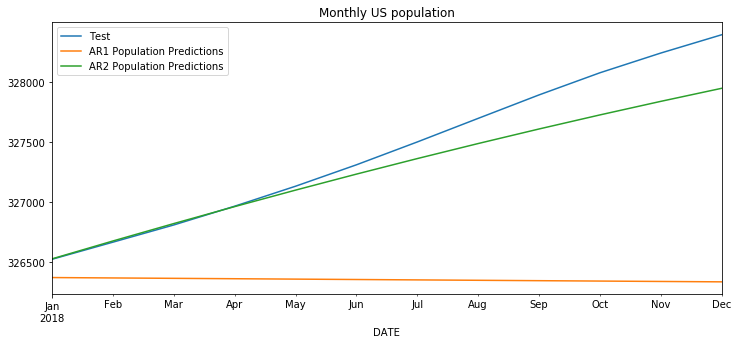

In [17]:
# train['PopEst'].plot(title='Monthly US population', label='Train')
test['PopEst'].plot(title='Monthly US population', label='Test')
AR1_pred.plot()
AR2_pred.plot()
plt.legend();

# Model / AR(p)

In [18]:
model = AR(train['PopEst'])
ARpfit = model.fit(ic='t-stat')

In [19]:
print('Max lags: {}'.format(ARpfit.k_ar))
print()
print('Cofficients:\n{}'.format(ARpfit.params))

Max lags: 8

Cofficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [20]:
AR8_pred = ARpfit.predict(len(train), len(df)-1, dynamic=False).rename('AR8 Population Predictions')

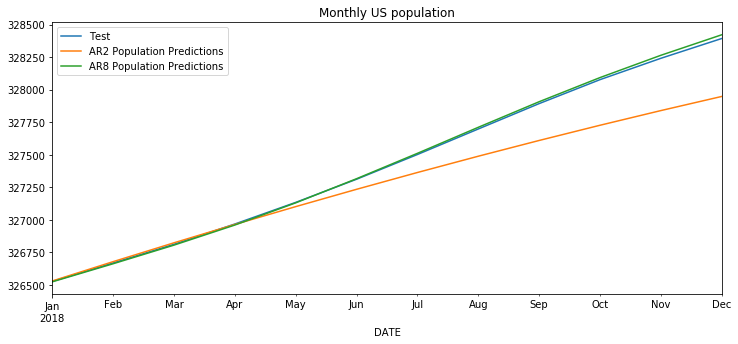

In [21]:
test['PopEst'].plot(title='Monthly US population', label='Test')
AR2_pred.plot()
AR8_pred.plot()
plt.legend();

# Evaluation

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
for i in [[AR1_pred, '1 lag'], [AR2_pred,'2 lags'], [AR8_pred,'8 lags']]:
    print('mean_squared_error is {} for {}'.format(mean_squared_error(test ,i[0]),i[1]))

mean_squared_error is 1542491.0610504877 for 1 lag
mean_squared_error is 52706.46529593951 for 2 lags
mean_squared_error is 186.97058618962419 for 8 lags


# Forecast for Future

In [24]:
model = AR(df['PopEst'])

In [25]:
AR_fit = model.fit(ic='t-stat')

In [27]:
print('Max lags: {}'.format(AR_fit.k_ar))
print()
print('Cofficients:\n{}'.format(AR_fit.params))

Max lags: 12

Cofficients:
const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64


In [32]:
AR12_pred = AR_fit.predict(len(df), len(df)+11, dynamic=False).rename('Future(2019) Population Predictions')

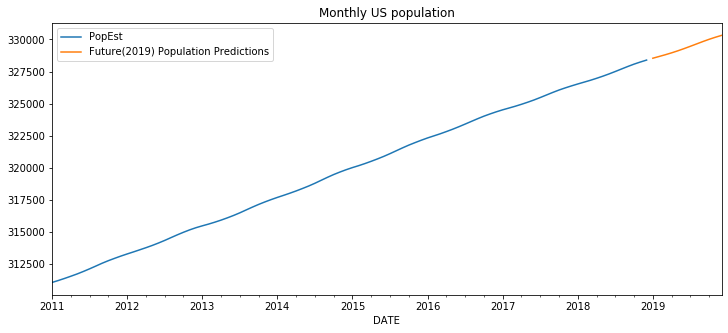

In [33]:
df['PopEst'].plot(title='Monthly US population')
AR12_pred.plot();
plt.legend()